# SSVI calibration

In [2]:
import torch

### Define class with parameters to be calibrated

In [18]:
class SSVI(torch.nn.Module):
  def __init__(self, f):
    super().__init__()
    
    self.theta = torch.nn.parameter.Parameter(torch.Tensor([0.2]))
    self.beta = torch.nn.parameter.Parameter(torch.Tensor([2.]))
    self.rho = torch.nn.parameter.Parameter(torch.Tensor([0.]))    
   
    self.f = f # Forward

  def forward(self, x):
      return self.theta * torch.sqrt(0.5*(1.+self.rho*self.beta*torch.log(x/f)+torch.sqrt((self.beta*torch.log(x/f)+self.rho)**2+(1-self.rho**2))))

In [19]:
f = torch.Tensor([1.])
ssvi = SSVI(f)

x = torch.Tensor([0.5,1.,1.5])
y = torch.Tensor([0.25,0.2,0.25])

optimizer = torch.optim.LBFGS(ssvi.parameters(), lr=1)

In [20]:
ssvi.forward(x)

tensor([0.2328, 0.2000, 0.2139], grad_fn=<MulBackward0>)

In [21]:
def closure():
    optimizer.zero_grad()        
    output = ssvi.forward(x) 
    loss = torch.nn.MSELoss()(output,y)
    loss.backward()
    return loss

In [22]:
optimizer.step(closure)

tensor(0.0005, grad_fn=<MseLossBackward>)

In [23]:
ssvi.theta
ssvi.beta
ssvi.rho

Parameter containing:
tensor([0.1607], requires_grad=True)

In [24]:
output = ssvi.forward(x)
output

tensor([0.2500, 0.2000, 0.2500], grad_fn=<MulBackward0>)

In [25]:
import matplotlib.pyplot as plt

In [27]:
x = torch.Tensor([0.5,1.,1.5])
y = torch.Tensor([0.25,0.2,0.25])

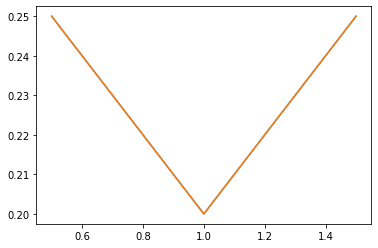

In [28]:
plt.plot(x,y)
plt.plot(x,output.detach().numpy())